In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#load data from excel into dataframe
df=pd.read_excel('SV 2016 data edited 12202016.xlsx')
df1=df.copy()

In [3]:
numCols = df1.select_dtypes(include=[np.number]).columns
df1[numCols] = (df1[numCols]-df1[numCols].mean())/df1[numCols].std()

In [4]:
df1.head()

,New Model Purchased (Alpha Order),New Model Purchased - Brand,New Model Segment,Most Important Purchase Reason (2014/2016 Version),Segment Most Seriously Considered,Most Important Reason Didnt Buy Model Most Seriously Considered,Marital Status,Generation,Education,Occupation,...,I will easily switch brands for price or features,There are lots of different brands of vehicles that I would consider buying,I want a vehicle that provides the quietest interior,I want to look good when driving my vehicle,I want my vehicle to stand out in a crowd,I want the most versatility in my interior,I would pay significantly more for environmentally friendly vehicle,My vehicle is a reflection of my achievement,I chose my vehicle to reward myself for my hard work,The brand of vehicle I buy makes a statement about who I am
0,Chrysler 200 Sdn,Chrysler,Mid-Size Car,Handling,SUV,Other (not listed),Married,Leading Edge Boomers (1946 - 1959),Some Post-Grad,"Teacher, Educator - Retired",...,-1.603247,0.635340,0.094536,0.203591,-0.521968,-1.803882,-1.361810,-1.760987,-2.036783,-1.910942
1,Chrysler 200 Sdn,Chrysler,Mid-Size Car,Overall driving performance,Sporty Car,Available financing or leasing terms,Partnered,Generation X (1965 - 1978),Some College,Technical Specialty,...,-1.603247,-0.163792,-1.006434,0.203591,-0.521968,-0.739908,-1.361810,-0.155964,0.448301,-0.277402
2,Chrysler 200 Sdn,Chrysler,Mid-Size Car,Overall exterior workmanship,Larger Car,Price/deal offered,Married,Millennials (1979 - ),College Graduate,"Police, Postal, Fire",...,1.449585,1.434471,0.094536,1.157062,1.256185,0.324066,-0.514781,0.646547,1.276663,0.539367
3,Chrysler 200 Sdn,Chrysler,Mid-Size Car,Overall safety of the vehicle,Larger Car,Other (not listed),Married,Millennials (1979 - ),College Graduate,Health Care,...,-0.076831,-0.163792,0.094536,-1.703352,-1.411044,-0.739908,0.332248,-0.958476,0.448301,-0.277402
4,Chrysler 200 Sdn,Chrysler,Mid-Size Car,Price/deal offered,Smaller Car,Didn't like it / preferred vehicle bought,Single,Millennials (1979 - ),High School Graduate,Executive/Managerial,...,-0.076831,0.635340,-1.006434,1.157062,1.256185,0.324066,2.026307,1.449058,1.276663,-0.277402


In [5]:
var = 'New Model Purchased - Brand'

In [6]:
segmentList = df1[var].dropna().unique()
segmentList

array(['Chrysler', 'Dodge', 'Ford', 'Lincoln', 'Chevrolet', 'Buick',
       'Cadillac', 'Kia', 'Subaru', 'Honda', 'Acura', 'Nissan', 'Infiniti',
       'Scion', 'Toyota', 'Lexus', 'Mazda', 'Mitsubishi', 'Hyundai',
       'Mini', 'BMW', 'Jaguar', 'Mercedes-Benz', 'Porsche', 'Volkswagen',
       'Audi', 'Volvo', 'Fiat', 'smart', 'Tesla', 'Land Rover', 'Ram',
       'Jeep', 'GMC'], dtype=object)

In [7]:
segmentFrames = []
for s in segmentList:
    segmentFrames.append(df1[df1[var]==s].mean())

In [8]:
segFrame = pd.concat(segmentFrames,axis=1)
segFrame.columns=segmentList

In [ ]:
segFrame['smart']-segFrame['Nissan']

In [9]:
pca = PCA(n_components=2)
Y = pca.fit_transform(segFrame.T)

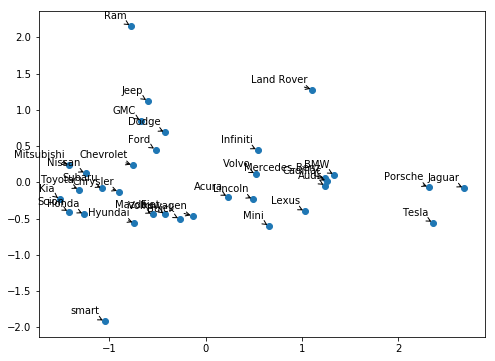

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(Y[:,0], Y[:,1])
for label, x, y in zip(segmentList, Y[:,0], Y[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-5, 5),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [ ]:
Y